In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score,ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: threadpoolctl>=2.0.0 in c:\programdata\anaconda3\lib\site-packages (from imbalanced-learn->imblearn) (2.2.0)



In [3]:
data = pd.read_csv('C:/Users/harip/Desktop/Preparation/datascience/programs/Untitled Folder/LinkedIn/diabetes_prediction_dataset.csv')

In [4]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [8]:
for i in data.keys():
    print(i,data[i].unique())

gender ['Female' 'Male' 'Other']
age [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension [0 1]
heart_disease [1 0]
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes [

In [9]:
data.duplicated().sum()

3854

In [118]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
96141    False
96142    False
96143    False
96144    False
96145    False
Length: 96146, dtype: bool

In [115]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [116]:
data.shape

(96146, 9)

In [117]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [14]:
## Smoking history distribution

Text(0, 0.5, 'Count')

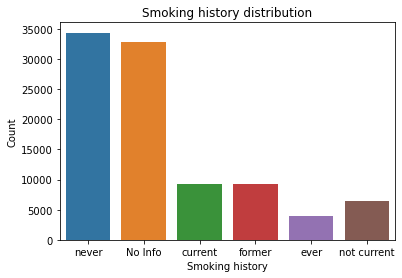

In [15]:
sns.countplot(x='smoking_history', data = data)
plt.title('Smoking history distribution')
plt.xlabel('Smoking history')
plt.ylabel('Count')

<AxesSubplot:xlabel='age', ylabel='Count'>

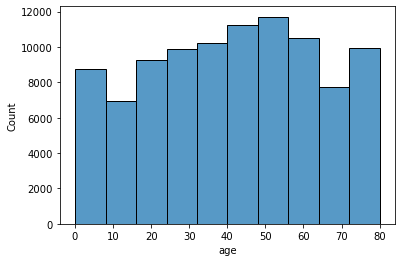

In [16]:
sns.histplot(x=data['age'], bins=10)

<AxesSubplot:xlabel='diabetes', ylabel='age'>

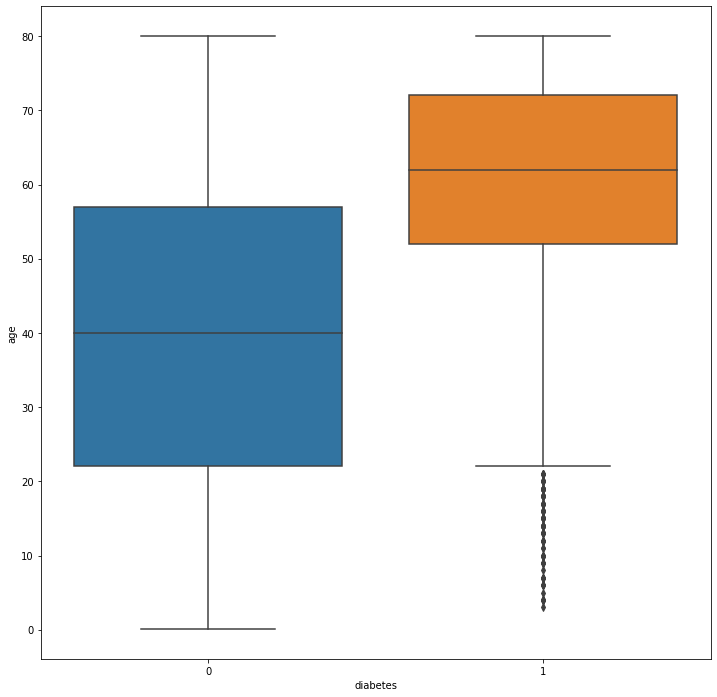

In [17]:
plt.figure(figsize=(12,12))
sns.boxplot(x=data['diabetes'],y=data['age'])


<AxesSubplot:xlabel='smoking_history', ylabel='count'>

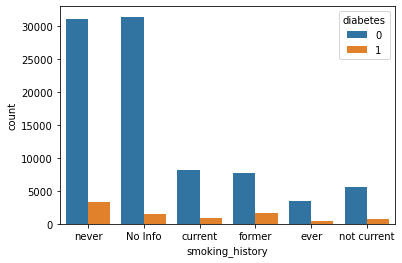

In [23]:
sns.countplot(x = data['smoking_history'] , hue = data['diabetes'])

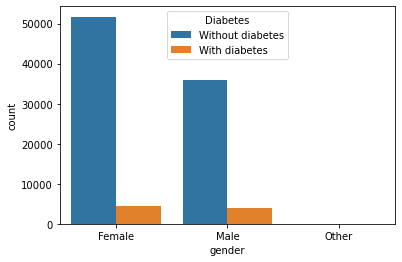

In [25]:
sns.countplot(x=data['gender'], hue = data['diabetes'])
plt.legend(title = 'Diabetes', labels = ['Without diabetes', 'With diabetes'])

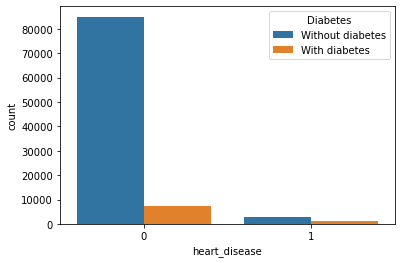

In [26]:
sns.countplot(x=data['heart_disease'], hue = data['diabetes'])
plt.legend(title = 'Diabetes', labels = ['Without diabetes', 'With diabetes'])

In [27]:
#Correlation heat map

<AxesSubplot:>

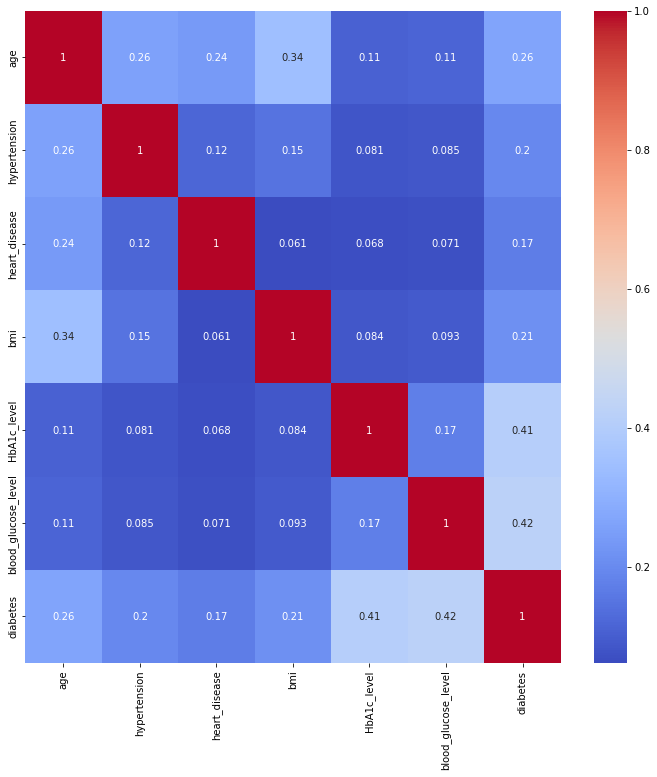

In [30]:
corr = data[['age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot= True, cmap = 'coolwarm')

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [119]:
encoder1 = OneHotEncoder(sparse=False)
encoder2 = OneHotEncoder(sparse= False)

In [45]:
df1 = encoder1.fit_transform(X = [[category] for category in data['smoking_history']])
df2 = encoder2.fit_transform(X = [[category] for category in data['gender']])

In [120]:
data['smoking_history']

0          never
1        No Info
2          never
3        current
4        current
          ...   
96141    No Info
96142    No Info
96143     former
96144      never
96145    current
Name: smoking_history, Length: 96146, dtype: object

In [121]:
df3= encoder1.fit_transform(X= data[['smoking_history']])
df4 = encoder2.fit_transform(X=data[['gender']])

In [122]:
print(df3)

[[0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [123]:
df1 = pd.DataFrame(df3, columns=encoder1.get_feature_names_out())
df2 = pd.DataFrame(df4, columns=encoder2.get_feature_names_out())

In [124]:
encoded_data = pd.concat([df1,df2],axis =1)

In [125]:
X = pd.concat((data[['age', 'hypertension', 'heart_disease','bmi', 'HbA1c_level', 'blood_glucose_level']],
               pd.DataFrame(encoded_data)),axis =1)

In [130]:
X.shape

(96146, 15)

In [104]:
#Scaling X

In [131]:
scaler = StandardScaler()

In [132]:
X = scaler.fit_transform(X)

In [133]:
X

array([[ 1.7008397 , -0.29005038,  4.84853426, ...,  0.8437837 ,
        -0.8434586 , -0.01368394],
       [ 0.54337205, -0.29005038, -0.2062479 , ...,  0.8437837 ,
        -0.8434586 , -0.01368394],
       [-0.61409561, -0.29005038, -0.2062479 , ..., -1.18513784,
         1.18559464, -0.01368394],
       ...,
       [ 1.07758788, -0.29005038, -0.2062479 , ..., -1.18513784,
         1.18559464, -0.01368394],
       [-0.79216755, -0.29005038, -0.2062479 , ...,  0.8437837 ,
        -0.8434586 , -0.01368394],
       [ 0.676926  , -0.29005038, -0.2062479 , ...,  0.8437837 ,
        -0.8434586 , -0.01368394]])

In [134]:
 y = data['diabetes']

In [135]:
y.value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [136]:
#Imbalance dataset

In [137]:
#We can see our y is imbalanced. So for solving this problem, we oversample our dataset by creating imaginary '1' values in dataset

In [138]:
smote = SMOTE(sampling_strategy='minority')

In [139]:
X,y = smote.fit_resample(X,y)

In [140]:
y.value_counts()

0    87664
1    87664
Name: diabetes, dtype: int64

In [141]:
algos = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best','random']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'ada_boost_classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100]
        }
    },
    'gradient_boosting_classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100],
            'loss': ['log_loss', 'exponential']
        }
    },
    'bagging_classifier': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gaussian_naive_bayes': {
        'model': GaussianNB(),
        'params': {
        }
    },
    'multinomial_naive_bayes': {
        'model': MultinomialNB(),
        'params': {
        }
    }
}

In [145]:
scores = []
for name,mp in algos.items():
    reg = GridSearchCV(estimator=mp['model'],param_grid=mp['params'], cv =5)
    reg.fit(X,y)
    scores.append({
        'model' : name,
        'accuracy': reg.best_score_,
        'best params' : reg.best_params_
    })
    

KeyboardInterrupt: 

In [146]:
score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,logistic_regression,NaN,NaN


In [147]:
#Split X and y

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [150]:
model = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [151]:
model.score(X_test,y_test)

0.9743151010475485

In [152]:
y_pred = model.predict(X_test)

In [153]:
#Confusion matrix

In [154]:
cm = confusion_matrix(y_test,y_pred)

In [155]:
cm

array([[25488,   747],
       [  604, 25760]], dtype=int64)

In [156]:
cl = classification_report(y_test,y_pred)

In [158]:
print(cl)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     26235
           1       0.97      0.98      0.97     26364

    accuracy                           0.97     52599
   macro avg       0.97      0.97      0.97     52599
weighted avg       0.97      0.97      0.97     52599



In [159]:
#Principal Component Analysis

In [163]:
pca = PCA(n_components=12)

In [164]:
X_pca = pca.fit_transform(X)

In [165]:
X_pca.shape

(175328, 12)

In [166]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size = 0.3 , random_state = 42)

In [167]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [168]:
y_pred1 = model.predict(X_test)

In [169]:
cm = confusion_matrix(y_test,y_pred1)
cm

array([[24689,  1546],
       [  774, 25590]], dtype=int64)

In [170]:
print(accuracy_score(y_test,y_pred1))

0.9558926975798019


In [172]:
cl1 =classification_report(y_test,y_pred1)
print(cl1)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     26235
           1       0.94      0.97      0.96     26364

    accuracy                           0.96     52599
   macro avg       0.96      0.96      0.96     52599
weighted avg       0.96      0.96      0.96     52599

